## Проект 2. Разведывательный анализ данных - ЮНИСЕФ

**Цели и задачи проекта:**
1. Получить общее представление о датасете и переменных в него входящих.
2. Очистить датасет от "мусора" и повысить качество входных данных.
3. Отследить влияние разных факторов в датасете на оценку по математике.

### 1. Получить общее представление о датасете и переменных в него входящих.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

df = pd.read_csv('stud_math.csv')
display(df.head(10))
df.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [2]:
f'Кол-во пустых значений в датасете: \
{round(sum(df.isnull().sum()) / (len(df.columns) * len(df)) * 100, 2)}%'

'Кол-во пустых значений в датасете: 4.77%'

In [3]:
f'Кол-во повторяющихся строк в датасете: \
{df.duplicated().sum()}'

'Кол-во повторяющихся строк в датасете: 0'

#### Выводы о датасете:
 - 30 переменных (1 искомая + 29 входных)
 - 395 наблюдений (строк)
 - 4.77% значений пропущено
 - нет повторяющихся строк
 - 12 переменных типа float, 1 переменная типа int, 17 строковых переменных

### 2. Очистить датасет от "мусора" и повысить качество входных данных.

In [4]:
def find_outliers(pd_series):
    '''
        Функция для поиска выборосов.
        На входе получает список типа pd.Series,
        на выходе - список элементов данного списка,
        считающиеся выбросами.
    '''
    quart25 = pd_series.quantile(0.25)
    quart75 = pd_series.quantile(0.75)
    iqr = quart75 - quart25
    
    return pd_series[(pd_series < quart25 - 1.5 * iqr) |
                     (pd_series > quart75 + 1.5 * iqr)]

In [5]:
def assign_loaded_var(bigger_value):
    '''
        Функция для присвоения значения на основании вероятности.
        На входе получает % вероятность бОльшей величины,
        на выходе - присваивает значение исходя из данной вероятности.
        Использовать только со значениями в диапазоне от 0 до 1 и
        2 возможными значениями на выходе!
    '''
    if random.random() <= bigger_value:
      return 0
    else:
      return 1

In [6]:
def replace_with_ix(series_name):
    '''
        Функция которая на входе получает название колонки в датафрейме
        и заменяет значения на целочисленные индексы.
        Используется для обработки строковых переменных в статистиках
    '''
    # Превратим результат value_counts() в словарь со значением индексов в кач-ве ключей
    vc = df[series_name].value_counts(normalize=True, dropna=False).rename_axis('unique_values').reset_index(name='counts')
    d = vc['unique_values'].to_dict()

    # Подставим индексы вместо названий и поменяем тип столбца на целочисленный
    df[series_name] = df[series_name].apply(lambda x: list(d.keys())[list(d.values()).index(x)])
    df[series_name] = df[series_name].astype(int)

### school

GP    0.883544
MS    0.116456
Name: school, dtype: float64

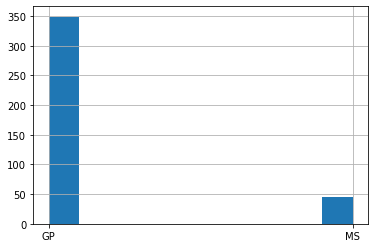

In [7]:
df['school'].hist()
df['school'].value_counts(normalize=True, dropna=False)

### sex

F    0.526582
M    0.473418
Name: sex, dtype: float64

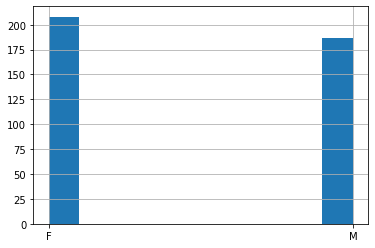

In [8]:
df['sex'].hist()
df['sex'].value_counts(normalize=True, dropna=False)

### age

In [9]:
df['age'].describe()

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

In [10]:
df['age'].value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

In [11]:
find_outliers(df['age'])

247    22
Name: age, dtype: int64

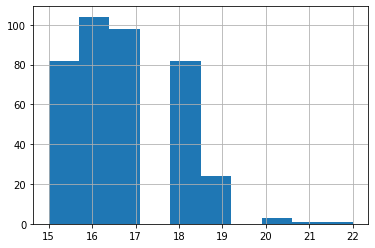

In [12]:
df['age'].hist()

### address

In [13]:
df['address'].value_counts(normalize=True, dropna=False)

U      0.746835
R      0.210127
NaN    0.043038
Name: address, dtype: float64

In [14]:
# Заменим значения на более понятные

df['address'] = df['address'].str.replace('U', 'city')

df['address'] = df['address'].str.replace('R', 'countryside')

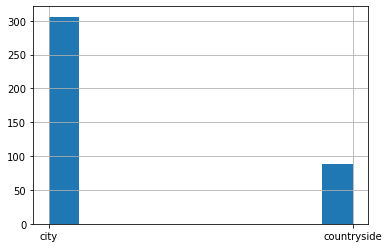

In [15]:
# Хотя адрес не представляется возможным присвоить для пропущенных
# значений на основании других переменных, присвоим адрес просто на
# основании стат. вероятности (в качестве упражнения).

# Превратим value_counts() в % в датафрейм
vc = df['address'].value_counts(normalize=True, dropna=False).rename_axis('unique_values').reset_index(name='counts')

# Присвоим 'U' или 'R' на основании вероятности
df['address'] = df['address'].astype(str).apply(lambda x: vc.iloc[assign_loaded_var(vc.iloc[0, 1]), 0] if x.strip().lower() == 'nan' else x)
df['address'].hist()

### famsize

In [16]:
df['famsize'].value_counts(normalize=True, dropna=False)

GT3    0.660759
LE3    0.270886
NaN    0.068354
Name: famsize, dtype: float64

In [17]:
# Заменим значения на более понятные

df['famsize'] = df['famsize'].str.replace('LE3', '3 or less')

df['famsize'] = df['famsize'].str.replace('GT3', '4 or more')

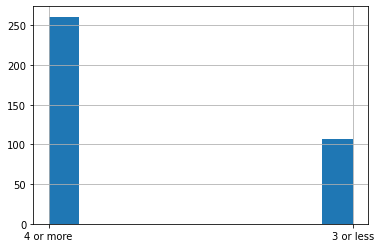

In [18]:
df['famsize'].hist()

### Pstatus

In [19]:
df['Pstatus'].value_counts(normalize=True, dropna=False)

T      0.794937
NaN    0.113924
A      0.091139
Name: Pstatus, dtype: float64

In [20]:
# Заменим значения на более понятные

df['Pstatus'] = df['Pstatus'].str.replace('T', 'Living together')

df['Pstatus'] = df['Pstatus'].str.replace('A', 'Separated')

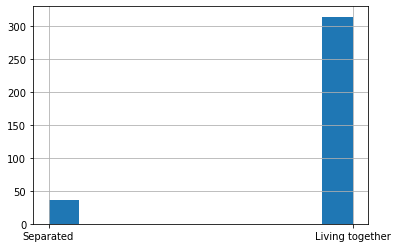

In [21]:
df['Pstatus'].hist()

In [22]:
# Попробуем восполнить значения Pstatus и famsize - возможно статус
# родителей связан с количеством человек в семье

df.groupby(['famsize', 'Pstatus'])[['school']].count()

# Увы, однозначной связи не обнаружено

school
famsize   Pstatus                
3 or less Living together      81
          Separated            13
4 or more Living together     213
          Separated            20

### Medu

In [23]:
df['Medu'].value_counts(normalize=True, dropna=False)

4.0    0.331646
2.0    0.258228
3.0    0.245570
1.0    0.149367
0.0    0.007595
NaN    0.007595
Name: Medu, dtype: float64

In [24]:
# Заменим тип данных на строковый и значения на более понятные

df['Medu'] = df['Medu'].astype(str)

df['Medu'] = df['Medu'].replace('0.0', 'нет')

df['Medu'] = df['Medu'].replace('1.0', '4 класса')

df['Medu'] = df['Medu'].replace('2.0', '5-9 классов')

df['Medu'] = df['Medu'].replace('3.0', 'среднее специальное или 11 классов')

df['Medu'] = df['Medu'].replace('4.0', 'высшее')

In [25]:
# Удалим для очистки единственный случай отсутствующего значения
df = df.query('Medu != "nan"')
len(df)        

392

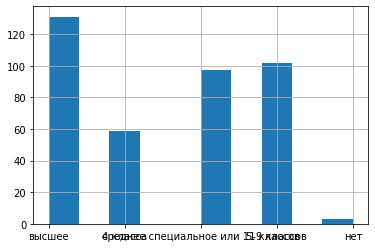

In [26]:
df['Medu'].hist()

### Fedu

In [27]:
df['Fedu'].value_counts(normalize=True, dropna=False)

2.0     0.267857
3.0     0.242347
4.0     0.224490
1.0     0.196429
NaN     0.061224
0.0     0.005102
40.0    0.002551
Name: Fedu, dtype: float64

In [28]:
# Заменим тип данных на строковый и значения на более понятные

df['Fedu'] = df['Fedu'].astype(str)

df['Fedu'] = df['Fedu'].replace('0.0', 'нет')

df['Fedu'] = df['Fedu'].replace('1.0', '4 класса')

df['Fedu'] = df['Fedu'].replace('2.0', '5-9 классов')

df['Fedu'] = df['Fedu'].replace('3.0', 'среднее специальное или 11 классов')

df['Fedu'] = df['Fedu'].replace('4.0', 'высшее')

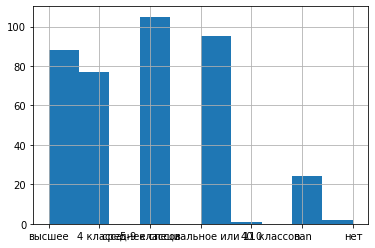

In [29]:
df['Fedu'].hist()

### Mjob

other       0.334184
services    0.247449
at_home     0.147959
teacher     0.140306
health      0.081633
NaN         0.048469
Name: Mjob, dtype: float64

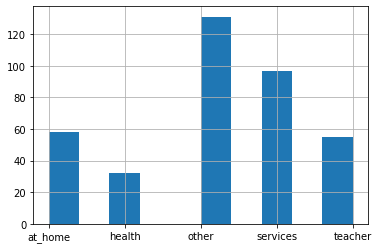

In [30]:
df['Mjob'].hist()
df['Mjob'].value_counts(normalize=True, dropna=False)

### Fjob

other       0.500000
services    0.255102
NaN         0.091837
teacher     0.073980
at_home     0.040816
health      0.038265
Name: Fjob, dtype: float64

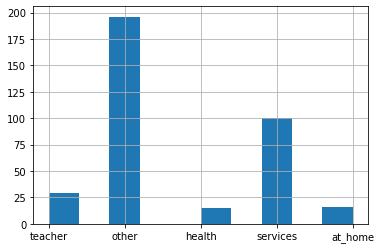

In [31]:
df['Fjob'].hist()
df['Fjob'].value_counts(normalize=True, dropna=False)

### reason

course        0.349490
home          0.262755
reputation    0.257653
other         0.086735
NaN           0.043367
Name: reason, dtype: float64

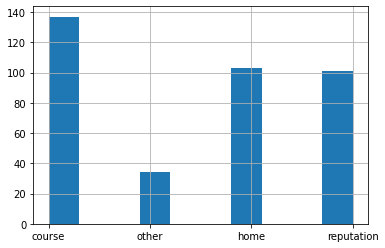

In [32]:
df['reason'].hist()
df['reason'].value_counts(normalize=True, dropna=False)

### guardian

mother    0.635204
father    0.214286
NaN       0.079082
other     0.071429
Name: guardian, dtype: float64

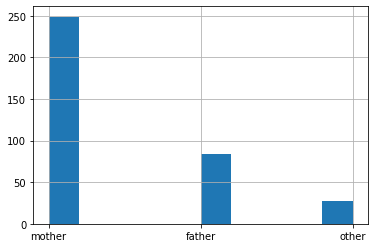

In [33]:
df['guardian'].hist()
df['guardian'].value_counts(normalize=True, dropna=False)

### traveltime

In [34]:
df['traveltime'].value_counts(normalize=True, dropna=False)

1.0    0.609694
2.0    0.244898
NaN    0.071429
3.0    0.056122
4.0    0.017857
Name: traveltime, dtype: float64

In [35]:
# Заменим в качестве упражнения отсутствующие значения самой
# распространённой категорией (до 15 мин.)

df['traveltime'] = df['traveltime'].apply(lambda x: 1 if x != x else x)

In [36]:
# Заменим тип данных на строковый и значения на более понятные

df['traveltime'] = df['traveltime'].astype(str)

df['traveltime'] = df['traveltime'].replace('1.0', '<15 мин.')

df['traveltime'] = df['traveltime'].replace('2.0', '15-30 мин.')

df['traveltime'] = df['traveltime'].replace('3.0', '30-60 мин.')

df['traveltime'] = df['traveltime'].replace('4.0', '>60 мин.')

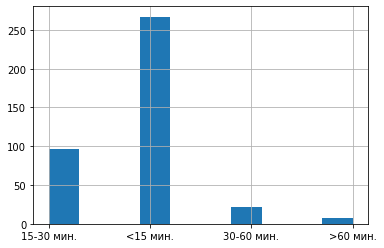

In [37]:
df['traveltime'].hist()

In [38]:
# Попробуем восполнить значения traveltime и reason - возможно есть
# прямая связь между временем поездки и выбором школы на основании
# близости к дому (reason=home)

df.groupby(['traveltime', 'reason'])[['school']].count()

# Увы, однозначной связи не обнаружено - есть достаточно много и тех,
# кто долго ездит в школу, при этом ответил, что школа выбрана именно
# по критерию близости к дому

school
traveltime reason            
15-30 мин. course          32
           home            24
           other            8
           reputation      30
30-60 мин. course          11
           home             3
           other            3
           reputation       5
<15 мин.   course          89
           home            74
           other           23
           reputation      66
>60 мин.   course           5
           home             2

### studytime

In [39]:
df['studytime'].value_counts(normalize=True, dropna=False)

2.0    0.489796
1.0    0.260204
3.0    0.163265
4.0    0.068878
NaN    0.017857
Name: studytime, dtype: float64

In [40]:
# Заменим тип данных на строковый и значения на более понятные

df['studytime'] = df['studytime'].astype(str)

df['studytime'] = df['studytime'].replace('1.0', '<2 часов')

df['studytime'] = df['studytime'].replace('2.0', '2-5 часов')

df['studytime'] = df['studytime'].replace('3.0', '5-10 часов')

df['studytime'] = df['studytime'].replace('4.0', '>10 часов')

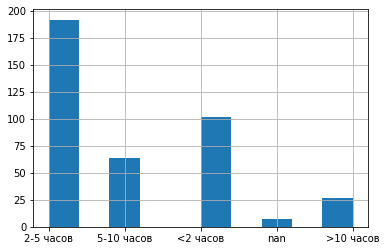

In [41]:
df['studytime'].hist()

### failures

In [42]:
df['failures'].value_counts(normalize=True, dropna=False)

0.0    0.742347
1.0    0.122449
NaN    0.056122
2.0    0.040816
3.0    0.038265
Name: failures, dtype: float64

In [43]:
# Заменим пропущенные значения медианной величиной (в
# качестве упражнения)

failures_median = df['failures'].median()

df['failures'] = df['failures'].apply(lambda x: failures_median if x != x else x)

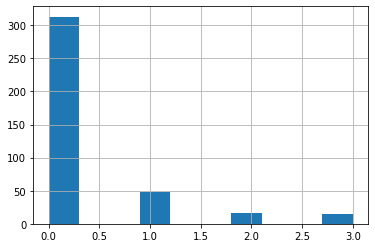

In [44]:
df['failures'].hist()

In [45]:
len(find_outliers(df['failures']))

79

### schoolsup

no     0.849490
yes    0.127551
NaN    0.022959
Name: schoolsup, dtype: float64

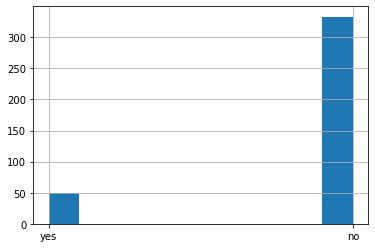

In [46]:
df['schoolsup'].hist()
df['schoolsup'].value_counts(normalize=True, dropna=False)

### famsup

yes    0.553571
no     0.346939
NaN    0.099490
Name: famsup, dtype: float64

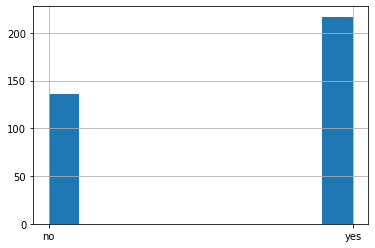

In [47]:
df['famsup'].hist()
df['famsup'].value_counts(normalize=True, dropna=False)

### paid

no     0.502551
yes    0.395408
NaN    0.102041
Name: paid, dtype: float64

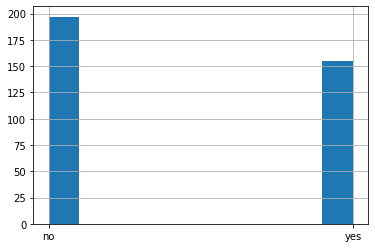

In [48]:
df['paid'].hist()
df['paid'].value_counts(normalize=True, dropna=False)

### activities

yes    0.494898
no     0.469388
NaN    0.035714
Name: activities, dtype: float64

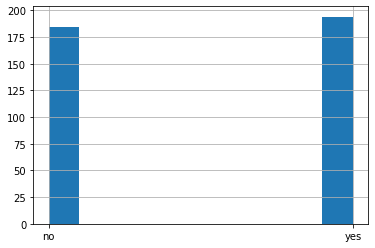

In [49]:
df['activities'].hist()
df['activities'].value_counts(normalize=True, dropna=False)

### nursery

yes    0.757653
no     0.201531
NaN    0.040816
Name: nursery, dtype: float64

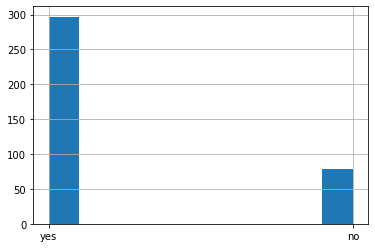

In [50]:
df['nursery'].hist()
df['nursery'].value_counts(normalize=True, dropna=False)

### higher

yes    0.903061
NaN    0.051020
no     0.045918
Name: higher, dtype: float64

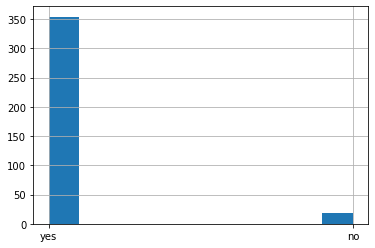

In [51]:
df['higher'].hist()
df['higher'].value_counts(normalize=True, dropna=False)

### internet

yes    0.775510
no     0.140306
NaN    0.084184
Name: internet, dtype: float64

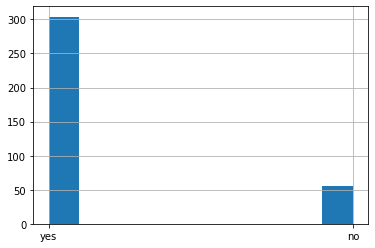

In [52]:
df['internet'].hist()
df['internet'].value_counts(normalize=True, dropna=False)

### romantic

no     0.607143
yes    0.316327
NaN    0.076531
Name: romantic, dtype: float64

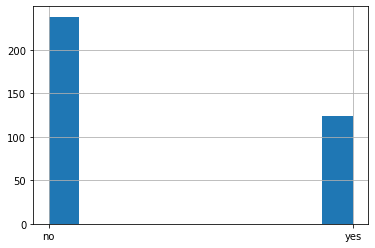

In [53]:
df['romantic'].hist()
df['romantic'].value_counts(normalize=True, dropna=False)

### famrel

In [54]:
df['famrel'].value_counts(normalize=True, dropna=False)

 4.0    0.461735
 5.0    0.250000
 3.0    0.155612
 NaN    0.068878
 2.0    0.043367
 1.0    0.017857
-1.0    0.002551
Name: famrel, dtype: float64

In [55]:
# -1 явно не верная константа - удаляем её из датасета

df = df.query('famrel != -1.0')
len(df)

391

In [56]:
# Заменим пропущенные значения средней арифметической величиной (в
# качестве упражнения). Округлим, т.к. правильные значения в шкале
# - целочисленные.

famrel_mean = round(df['famrel'].mean(), 0)

df['famrel'] = df['famrel'].apply(lambda x: failures_median if x != x else x)

In [57]:
len(find_outliers(df['famrel']))

27

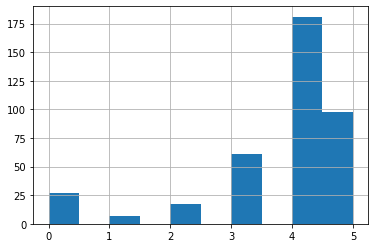

In [58]:
df['famrel'].hist()

### freetime

3.0    0.386189
4.0    0.286445
2.0    0.158568
5.0    0.094629
1.0    0.046036
NaN    0.028133
Name: freetime, dtype: float64

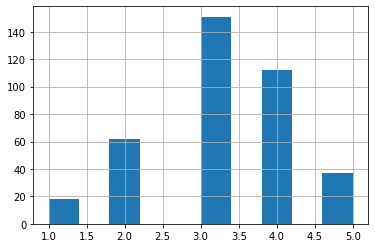

In [59]:
df['freetime'].hist()
df['freetime'].value_counts(normalize=True, dropna=False)

In [60]:
len(find_outliers(df['freetime']))

18

### goout

3.0    0.324808
2.0    0.253197
4.0    0.212276
5.0    0.132992
1.0    0.058824
NaN    0.017903
Name: goout, dtype: float64

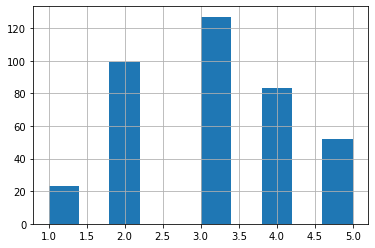

In [61]:
df['goout'].hist()
df['goout'].value_counts(normalize=True, dropna=False)

In [62]:
find_outliers(df['goout'])

Series([], Name: goout, dtype: float64)

### health

5.0    0.347826
3.0    0.227621
4.0    0.161125
1.0    0.120205
2.0    0.104859
NaN    0.038363
Name: health, dtype: float64

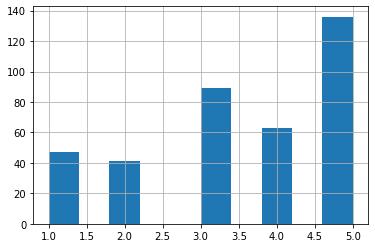

In [63]:
df['health'].hist()
df['health'].value_counts(normalize=True, dropna=False)

In [64]:
find_outliers(df['health'])

Series([], Name: health, dtype: float64)

### absences

(-0.386, 19.25]    358
(19.25, 38.5]       15
(38.5, 57.75]        3
(211.75, 231.0]      1
(57.75, 77.0]        1
(365.75, 385.0]      1
(250.25, 269.5]      0
(231.0, 250.25]      0
(269.5, 288.75]      0
(192.5, 211.75]      0
(346.5, 365.75]      0
(154.0, 173.25]      0
(134.75, 154.0]      0
(115.5, 134.75]      0
(96.25, 115.5]       0
(77.0, 96.25]        0
(288.75, 308.0]      0
(308.0, 327.25]      0
(327.25, 346.5]      0
(173.25, 192.5]      0
Name: absences, dtype: int64

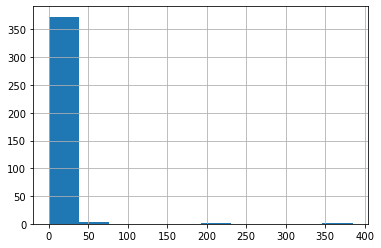

In [65]:
df['absences'].hist()
df['absences'].value_counts(bins=20, dropna=False)

In [66]:
# Посмотрим сколько случаев с отрицательными пропусками занятий,
# раз первая категория начинается с -0.386

len(df.query('absences < 0'))

# Таких случаев нет

0

#### Выводы о переменных:
 - school: 2 школы с существенным перекосом в пользу GP, пропусков нет
 - sex: приблизительно равная выборка без перекосов в пользу какого-либо из полов, пропусков нет
 - age: возраст с 15 по 22; средний - 16,7 с достаточно узким ст. отклонением (1,27); пропусков нет; единственный выброс - 1 студент возраста 22 лет
 - address: 2 значения с преобладанием городского адреса; 4.3% данных пропущено, в качестве упражнения подставил в пропуски "вероятностные" значения на основании остальной выборки, т.е. ок. 3/4 - city, 1/3 - countryside
 - famsize: 2 значения с перекосом в сторону крупных семей (4+ членов); 6,8% пропусков (оставил как есть)
 - Pstatus: 2 значения с существенным перекосом в сторону полных семей, но, увы, аж 11,4% пропусков; попытка восстановить пропуски famsize / Pstatus за счёт друг друга была неуспешной, т.к. не выявлено однозначной связи между этими 2 переменными, поэтому пропуски оставил как есть
 - Medu: треть значений - высшее образование, хотя также существенны и другие категории; единственное отсутствующее значение удалил
 - Fedu: достаточно равномерно представлены 3 категории с 5 по 9 класс, 11 классов и высшее образование; пропуски оставил как есть
 - Mjob: преобладают общие категории other и services; пропуски оставил как есть
 - Fjob: ещё более существенно преобладают общие категории other и services; пропуски оставил как есть
 - reason: бОльшая часть выбрала школу из-за программы обучения, но половина также из-за близости к дому и на основании репутации школы; пропуски оставил как есть
 - guardian: почти в 2/3 случаев опекуном является мать; пропуски оставил как есть
 - traveltime: в подавляющем большинстве случаев ученики едут в школу не дольше 30 минут; в качестве упражнения пропуски заполнил самой распространённой категорией - до 15 минут; также попробовал узнать есть ли взаимная связь между временем поездки в школу и причиной выбора школы - возможно близость к школе в кач-ве причины = поездка до неё до 15 минут, но, увы, это предположение не подтвердилось
 - studytime: большинство училось до 5 часов; пропуски оставил как есть
 - failures: практически ни у кого не было провалов; в качестве упражнения заполнил пропуски медианой
 - schoolsup: в 85% случаев доп. обучения в школе не было; пропуски оставил как есть
 - famsup: в больше чем половине случаев домашнее доп. обучение было; почти 10% отсутствующих значений - оставил как есть
 - paid: у половины студентов не было репетиторских уроков по математике; также 10% пропусков - оставил как есть
 - activities: дополнительные занятия были почти у половины студентов; пропуски оставил как есть
 - nursery: 3/4 посещало детсад; пропуски оставил как есть
 - higher: практически все - больше 90% - студенты рассчитывают дальше получить высшее образование; пропуски оставил как есть
 - internet: у большинства студентов есть доступ в интернет; пропуски оставил как есть
 - romantic: больше 60% студентов находятся в романтических отношениях; пропуски оставил как есть
 - famrel: большинство студентов живёт в семьях с хорошими или очень хорошими отношениями; удалил 1 выброс с явно неверным значением (-1); пропуски в качестве упражнения заменил средней арифметической величиной; есть выбросы, но все так или иначе находятся в границах естественных значений шкалы от 1 до 5
 - freetime: в общем и целом мало студентов жалуются на отсутствие свободного времени; пропуски оставил как есть
 - goout: тот же случай как и с наличием свободного времени наблюдается и в области общения с друзьями; пропуски оставил как есть
 - health: меньше четверти студентов испытывает проблемы со здоровьем (категории 1 и 2); пропуски оставил как есть
 - absences: подавляющее большинство студентов пропустило до 20 занятий
---

**Общий вывод:**
Предполагаю, что studytime, failures, famsup, paid, activities, absences - скорее всего будут иметь бОльший вес / корреляцию с оценкой - будет интересно проверить эту догадку в последнем шаге анализа. Остальные факторы видятся как второстепенные или маловажные.

Также хотелось видеть в задании возможности восполнить пробелы в данных по косвенным или смежным признакам, но, увы, то ли таких возможностей не заметил, то ли они не предполагались (напр. пробовал "восстановить" пропуски в комбинации переменных famsize / Pstatus и reason / traveltime). Это видится как наилучший вариант, т.к. как удаление пропусков, так и их наличие могут в дальнейшем повлиять на результат.

Поэтому просто для упражнения заменил в нескольких случаях пропущенные значения средним, медианой и т.д. Интереснее всего (с точки зрения Питона) было написать ф-ию подстановки "вероятностного" значения, которой воспользовался для переменной address.

### 3. Отследить влияние разных факторов в датасете на оценку по математике.

In [67]:
# Проводим предобработку строковых переменных, заменив их на целочисленные значения их индексов

for col in df.columns:
    if df.dtypes[col] == np.object:    # является ли тип данных в столбце строкой? 
        replace_with_ix(col)
        print(col + ' is a string column, replacing with int indexes')
        
display(df.head(10))
df.info()

school is a string column, replacing with int indexes
sex is a string column, replacing with int indexes
address is a string column, replacing with int indexes
famsize is a string column, replacing with int indexes
Pstatus is a string column, replacing with int indexes
Medu is a string column, replacing with int indexes
Fedu is a string column, replacing with int indexes
Mjob is a string column, replacing with int indexes
Fjob is a string column, replacing with int indexes
reason is a string column, replacing with int indexes
guardian is a string column, replacing with int indexes
traveltime is a string column, replacing with int indexes
studytime is a string column, replacing with int indexes
schoolsup is a string column, replacing with int indexes
famsup is a string column, replacing with int indexes
paid is a string column, replacing with int indexes
activities is a string column, replacing with int indexes
nursery is a string column, replacing with int indexes
higher is a string co

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,0,0,18,0,2,2,0,2,2,3,0,0,1,0,0.0,1,1,0,1,0,-6.0,0,2,0,4.0,3.0,4.0,3.0,6.0,30.0
1,0,0,17,0,0,1,3,3,2,0,0,1,0,0,0.0,0,0,0,1,1,-6.0,0,0,0,5.0,3.0,3.0,3.0,4.0,30.0
2,0,0,15,0,1,0,3,3,2,0,3,0,0,0,3.0,1,1,2,1,0,-6.0,0,0,2,4.0,3.0,2.0,3.0,10.0,50.0
3,0,0,15,0,0,0,0,0,4,2,1,0,0,2,0.0,0,0,1,0,0,-9.0,0,0,1,3.0,2.0,2.0,5.0,2.0,75.0
4,0,0,16,0,0,0,2,1,0,0,1,1,0,0,0.0,0,0,1,1,0,-6.0,0,1,0,4.0,3.0,2.0,5.0,4.0,50.0
5,0,1,16,0,1,0,0,1,1,0,2,0,0,0,0.0,0,0,1,0,0,-6.0,0,0,0,5.0,4.0,2.0,5.0,10.0,75.0
6,0,1,16,1,1,0,1,0,0,0,1,0,0,0,0.0,0,1,0,1,0,-6.0,0,0,0,4.0,4.0,4.0,3.0,0.0,55.0
7,0,0,17,0,0,2,0,2,0,3,1,0,1,0,0.0,1,0,0,1,0,-6.0,0,1,0,4.0,1.0,4.0,1.0,6.0,30.0
8,0,1,15,0,1,2,2,0,1,0,1,0,0,0,0.0,0,0,1,1,0,-6.0,0,0,0,0.0,2.0,2.0,1.0,0.0,95.0
9,0,1,15,0,2,1,2,2,0,0,1,0,0,0,0.0,0,0,1,0,0,-6.0,0,0,0,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               391 non-null    int64  
 1   sex                  391 non-null    int64  
 2   age                  391 non-null    int64  
 3   address              391 non-null    int64  
 4   famsize              391 non-null    int64  
 5   Pstatus              391 non-null    int64  
 6   Medu                 391 non-null    int64  
 7   Fedu                 391 non-null    int64  
 8   Mjob                 391 non-null    int64  
 9   Fjob                 391 non-null    int64  
 10  reason               391 non-null    int64  
 11  guardian             391 non-null    int64  
 12  traveltime           391 non-null    int64  
 13  studytime            391 non-null    int64  
 14  failures             391 non-null    float64
 15  schoolsup            391 non-null    int

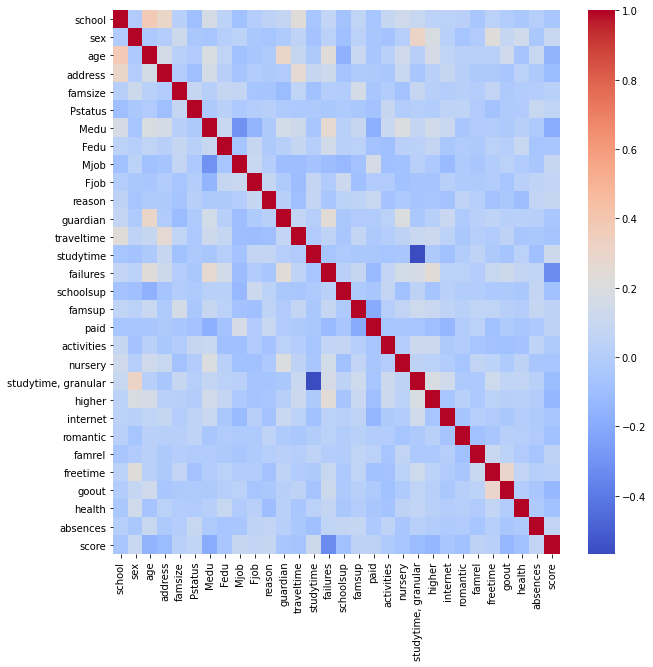

In [68]:
# Построим график, иллюстрирующий корреляцию между значениями переменных

fig, ax = plt.subplots(figsize=(10,10)) 

c = df.corr()

sns.heatmap(c, annot=False, cmap='coolwarm', ax=ax)

In [69]:
# Выведем значения коэф. корреляции всех переменных на оценку по математике

c.iloc[:, -1][:-1].sort_values(ascending=False)

studytime              0.119247
sex                    0.103426
Mjob                   0.090162
reason                 0.086477
Fjob                   0.069718
absences               0.064013
Pstatus                0.057162
paid                   0.049853
famrel                 0.046274
famsup                 0.045441
freetime               0.027844
famsize                0.020423
activities            -0.021828
Fedu                  -0.042372
internet              -0.043837
school                -0.048619
guardian              -0.052001
nursery               -0.054966
traveltime            -0.063216
health                -0.079369
schoolsup             -0.081111
romantic              -0.082500
address               -0.113495
studytime, granular   -0.114766
goout                 -0.127866
higher                -0.135297
age                   -0.153452
Medu                  -0.190790
failures              -0.335147
Name: score, dtype: float64

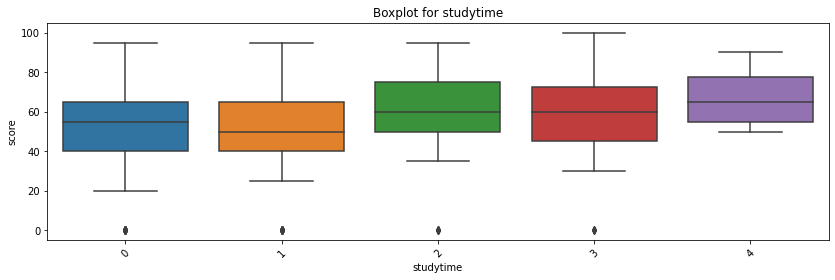

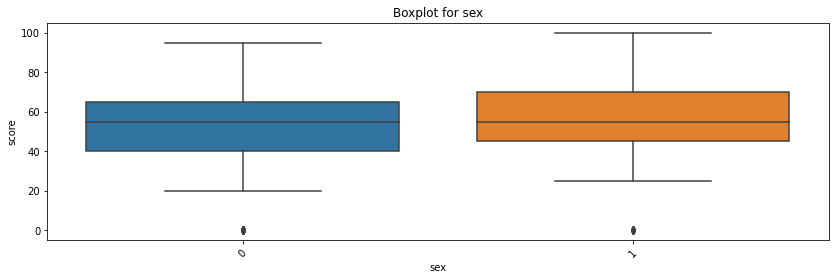

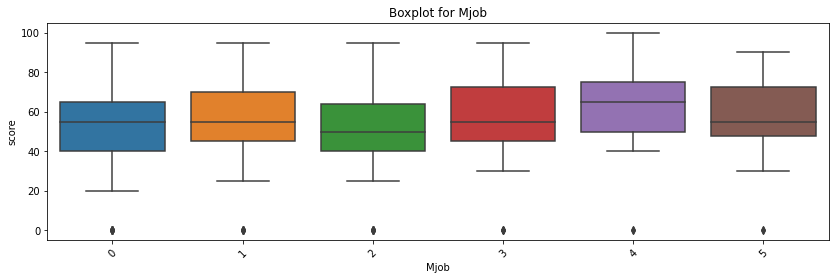

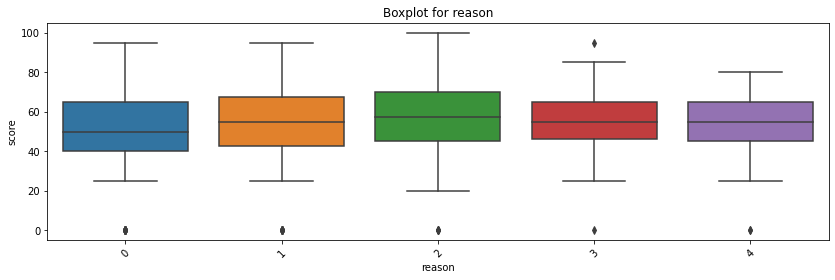

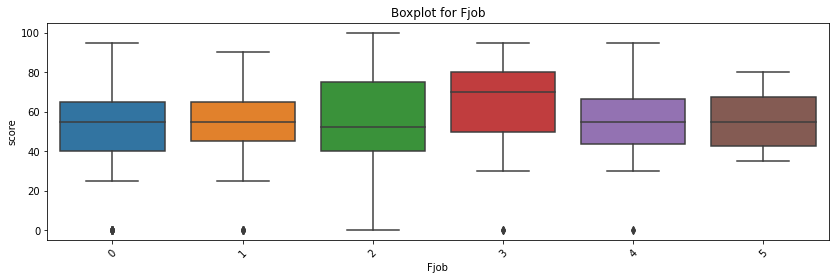

In [70]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot( x=column
                ,y='score' 
                ,data=df.loc[df[column].isin(df[column].value_counts().index[:10])]
                ,ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
for col in ['studytime', 'sex', 'Mjob', 'reason', 'Fjob']:
    get_boxplot(col)

### Выводы:
 - Только частично подтвердилась моя гипотеза из предыдущего шага: лишь время учёбы (studytime) оказалось важным - но при этом самым важным! - фактором, влияющим на оценку
 - Интересно, что по первоначальному анализу существенными оказались род деятельности отца и матери, причём только в случае отца профессия учителя оказала бОльшее влияние на оценку
 - Пол: при том, что средняя у обеих полов практически одинакова, разброс и перекос в сторону лучших / худших оценок противоположен
 - Также интересно было увидеть, что самую существенную роль на оценку с точки зрения выбора школы сыграла роль её репутации, а не обучающей программы - судя по всему, студенты / родители переоценивают свою способность её оценить (во всяком случае с точки зрения данного анализа)
 - Естественна и достаточно сильная отрицательная корреляция между кол-вом провалов (failures) и оценкой (чем меньше провалов, тем выше оценки), хотя иногда можно было бы предположить "мотивирующую" роль провалов
 - С точки зрения взаимной корреляции переменных обнаружилось несколько интересных моментов, но ничего из того, что можно было бы использовать напрямую для улучшения качества данных или более качественной прогнозирования оценки по математике